# Muon Observation Data Analysis
# By Max Fine for PHYC11 in 2022
Using "Muon Physics"

In [87]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants
c = scipy.constants.c
hbar = scipy.constants.hbar
me = scipy.constants.m_e
m_muon = 206.768283046 *me


In [88]:
# importing data from file
data_names = ['run1.data','run2.data','run3.data','run4.data']
f_name3 = "run5.data" #change to data file name, expects it to be in  'data/f_name'
f_name4 = 'run4.data'

path3 = "data/" + f_name3
path4 = 'data/' + f_name4

raw_data3 = np.genfromtxt(path3,delimiter=' ') # first index is row #, 2nd is col #
raw_data4 = np.genfromtxt(path4,delimiter=' ')

In [89]:
#data_dict

In [90]:
# data processing
decay_data3 = raw_data3[:,0]
decay_data4 = raw_data4[:,0]

# values of >40000 indicate that a muon did not decay so we remove them
#40000) #and np.where(decay_data > 60)) #40000) #40000)
index_proc3 = np.where(decay_data3 < 12000) 
proc_data3 = decay_data3[index_proc3]
# 14000
index_proc4 = np.where(decay_data4 < 12000) 
proc_data4 = decay_data4[index_proc4]



In [91]:
data_len3 = len(proc_data3)
data_len4 = len(proc_data4)
print(data_len3)
print(data_len4)

1718
5603


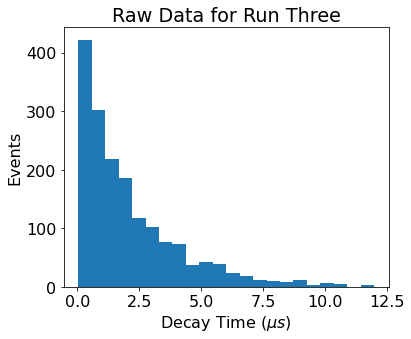

In [92]:
#displaying procc data 3
n_bins3 =  2 *int(len(proc_data3)**(1/3))
plt.figure(figsize=(6, 5))
#n_bins = 30
plt.hist(proc_data3/1000,n_bins3)#bins=int(len(proc_data)**0.5))
#plt.title('Muon Decay Time Histogram')
plt.xlabel('Decay Time ($\mu s$)')#($\mu$s)')
plt.ylabel('Events')
plt.title('Raw Data for Run Three')
plt.rcParams.update({'font.size': 16})

#plt.xlim(0,700)
plt.tight_layout()

plt.savefig('plots/3Raw_Muon_Decay_Time_Histogram.pdf')


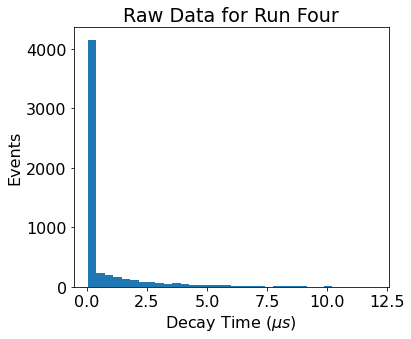

In [93]:
#displaying procc data 4
n_bins4 =  2 *int(len(proc_data4)**(1/3))
#n_bins = 30
plt.figure(figsize=(6, 5))
plt.hist(proc_data4/1000,n_bins4)#bins=int(len(proc_data)**0.5))
#plt.title('Muon Decay Time Histogram')
plt.xlabel('Decay Time ($\mu s$)')#($\mu$s)')
plt.rcParams.update({'font.size': 16})
plt.ylabel('Events')
plt.title('Raw Data for Run Four')
#plt.xlim(0,700)
plt.tight_layout()
plt.savefig('plots/4Raw_Muon_Decay_Time_Histogram.pdf')

In [94]:
# noise estimatation
# we take the avg events per bin for the last 2-3 bins and call it N 

bins3 = np.linspace(0, np.max(proc_data3),n_bins3 +1)
data_entries_3, bins_3 = np.histogram(proc_data3, bins=bins3,)
binscenters3 = np.array([0.5 * (bins3[i] + bins3[i+1]) for i in range(len(bins3)-1)])
noise3 = np.average(data_entries_3[-4:-1])
std3 = np.std(data_entries_3[-4:-1])
print(noise3)
print('std for noise3 is ' + str(std3))

bins4 = np.linspace(0, np.max(proc_data4),n_bins4 +1)
data_entries_4, bins_4 = np.histogram(proc_data4, bins=bins4,)
binscenters4 = np.array([0.5 * (bins4[i] + bins4[i+1]) for i in range(len(bins4)-1)])
noise4 = np.average(data_entries_4[-4:-1])
std4 = np.std(data_entries_4[-4:-1])
print(noise4)
print('std for noise4 is ' + str(std4))

3.6666666666666665
std for noise3 is 2.8674417556808756
1.0
std for noise4 is 0.816496580927726


In [95]:
# cutting out the first 500ns

index_proc3 = np.where(proc_data3 > 700) 
proc_data3 = proc_data3[index_proc3]


index_proc4 = np.where(proc_data4 > 700) 
proc_data4 = proc_data4[index_proc4]


In [96]:
# finding half life/ time const

def model3(t, tou, A):
    return A *np.exp((-1*t/tou)) + noise3 #+ N # A is not the same as n_0, N is noise 

def model4(t, tou, A):
    return A *np.exp((-1*t/tou)) + noise4 #+ N # A is not the same as n_0, N is noise 

def expected3(t,A):
    return A *np.exp((-1*t/(2.19703 *1000))) + noise3

def expected4(t,A):
    return A *np.exp((-1*t/(2.19703 *1000))) + noise4


# the first bin appears to be noisy, so we will mask it. 
# This wont effect the outcome if it was not noisy becaues it still follows exp
#n_bins = int(len(0.5*proc_data)**0.5)
#bins = np.linspace(0, np.max(proc_data),n_bins +1)
#data_entries_1, bins_1 = np.histogram(proc_data, bins=bins,)# density=True)
#data_entries = data_entries_1[1:]
#bins = np.linspace(0, np.max(proc_data),n_bins )
#binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
#guess = np.array([np.mean(proc_data), data_entries_1[0]])
#popt, pcov = curve_fit(model, xdata=binscenters, ydata=data_entries, p0=guess)#p0=[20000, 2.0, 2000, 3.0, 0.3])




In [114]:
noise3

3.6666666666666665

In [117]:
# fitting the model
bins3 = np.linspace(0, np.max(proc_data3),n_bins3 +1)
data_entries_3, bins_1 = np.histogram(proc_data3, bins=bins3,)# density=True)
data_entries3 = data_entries_3[2:]
bins3 = np.linspace(0, np.max(proc_data3),n_bins3 )
binscenters3 = np.array([0.5 * (bins3[i] + bins3[i+1]) for i in range(len(bins3)-2)])
guess = np.array([np.mean(proc_data3), data_entries3[0]])
popt3, pcov3 = curve_fit(model3, xdata=binscenters3, ydata=data_entries3, p0=guess)#p0=[20000, 2.0, 2000, 3.0, 0.3])
print( 1000*noise3 / (bins3[1]-bins3[0]))
print(1000*std3/(bins3[1]-bins3[0]))

bins4 = np.linspace(0, np.max(proc_data4),n_bins4 +1)
data_entries_1, bins_1 = np.histogram(proc_data4, bins=bins4,)# density=True)
data_entries4 = data_entries_1[2:]
bins4 = np.linspace(0, np.max(proc_data4),n_bins4 )
binscenters4 = np.array([0.5 * (bins4[i] + bins4[i+1]) for i in range(len(bins4)-2)])
guess = np.array([np.mean(proc_data4), data_entries4[0]])
popt4, pcov4 = curve_fit(model4, xdata=binscenters4, ydata=data_entries4, p0=guess)#p0=[20000, 2.0, 2000, 3.0, 0.3])
print( 1000*noise4 / (bins4[1]-bins4[0]))
std4 = np.std(data_entries_4[-4:-1])
print(1000*std4/(bins4[1]-bins4[0]))

5.815247634947134
4.5476956058377835
2.5876460767946576
2.112804174353882


popt3 [2134.01120761  256.09651842]
estimated lifetime is 2134.011207606637


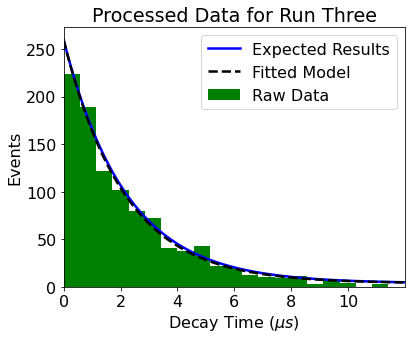

In [98]:
# plotting fitted models
plt.figure(figsize=(6, 5))
plt.bar(binscenters3/1000, data_entries3, width=(bins3[1] - bins3[0])/1000, color ='green', label=r'Raw Data')
xspace = np.linspace(0,20000,100000)
plt.plot(xspace /1000, expected3(xspace, popt3[1]), color='blue',linewidth=2.5 ,label=r'Expected Results')
plt.plot(xspace /1000, model3(xspace, *popt3), '--',color='black',linewidth=2.5 ,label=r'Fitted Model')
plt.xlim(0,np.max(proc_data4)/1000)
plt.xlabel(r'Decay Time ($\mu s$)')#($\mu$s)')
plt.ylabel(r'Events')
plt.legend(loc='best')
plt.title('Processed Data for Run Three')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.savefig('plots/fitted_Muon_Decay_Time_Histogram' +'3' +'.pdf')
print('popt3 ' + str(popt3))
half_life3 = popt3[0] # mew s
print('estimated lifetime is ' + str(half_life3))


popt4 [2010.7309544   215.40564813]
estimated lifetime is 2010.730954403553


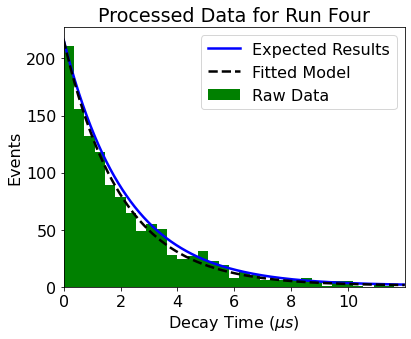

In [99]:
plt.figure(figsize=(6, 5))
plt.bar(binscenters4/1000, data_entries4, width=(bins4[1] - bins4[0])/1000, color ='green', label=r'Raw Data')
xspace = np.linspace(0,20000,100000)
plt.plot(xspace /1000, expected4(xspace, popt4[1]), color='blue',linewidth=2.5 ,label=r'Expected Results')
plt.plot(xspace /1000, model4(xspace, *popt4), '--',color='black',linewidth=2.5 ,label=r'Fitted Model')

plt.xlim(0,np.max(proc_data4)/1000)
plt.xlabel(r'Decay Time ($\mu s$)')#($\mu$s)')
plt.ylabel(r'Events')
plt.legend(loc='best')
plt.title('Processed Data for Run Four')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.savefig('plots/fitted_Muon_Decay_Time_Histogram' +'4' +'.pdf')
print('popt4 ' + str(popt4))
half_life4 = popt4[0] # mew s
print('estimated lifetime is ' + str(half_life4))

In [100]:
# final estimation
# using a weighted average of the two values. 
half_life = (half_life3 * len(binscenters3)+half_life4 *len(binscenters4))/(len(binscenters3) +len(binscenters4)) 
print(half_life)  #ns

2058.1464364047392


In [101]:
# error estimation 

In [102]:
# 10% more bins
n_bins3 = int(1.2* n_bins3)
n_bins4 = int(1.2 * n_bins4)

bins3 = np.linspace(0, np.max(proc_data3),n_bins3 +1)
data_entries_3, bins_1 = np.histogram(proc_data3, bins=bins3,)# density=True)
data_entries3 = data_entries_3[2:]
bins3 = np.linspace(0, np.max(proc_data3),n_bins3 )
binscenters3 = np.array([0.5 * (bins3[i] + bins3[i+1]) for i in range(len(bins3)-2)])
guess = np.array([np.mean(proc_data3), data_entries3[0]])
popt3, pcov3 = curve_fit(model3, xdata=binscenters3, ydata=data_entries3, p0=guess)#p0=[20000, 2.0, 2000, 3.0, 0.3])

bins4 = np.linspace(0, np.max(proc_data4),n_bins4 +1)
data_entries_1, bins_1 = np.histogram(proc_data4, bins=bins4,)# density=True)
data_entries4 = data_entries_1[2:]
bins4 = np.linspace(0, np.max(proc_data4),n_bins4 )
binscenters4 = np.array([0.5 * (bins4[i] + bins4[i+1]) for i in range(len(bins4)-2)])
guess = np.array([np.mean(proc_data4), data_entries4[0]])
popt4, pcov4 = curve_fit(model4, xdata=binscenters4, ydata=data_entries4, p0=guess)#p0=[20000, 2.0, 2000, 3.0, 0.3])

print('popt3 ' + str(popt3))
half_life3_high = popt4[0] # mew s

print('popt3 ' + str(popt4))
half_life4_high = popt4[0] # mew s

avg_half_life_high = ((half_life3_high * len(binscenters3)+half_life4_high *len(binscenters4))/(len(binscenters3) +len(binscenters4))) 
print(avg_half_life_high)  #ns

popt3 [2010.16034153  246.2268313 ]
popt3 [2444.07737163  156.82797219]
2444.077371630259


In [103]:
# 10% fewer bins
n_bins3 = int(0.8* n_bins3)
n_bins4 = int(0.8 * n_bins4)

bins3 = np.linspace(0, np.max(proc_data3),n_bins3 +1)
data_entries_3, bins_1 = np.histogram(proc_data3, bins=bins3,)# density=True)
data_entries3 = data_entries_3[2:]
bins3 = np.linspace(0, np.max(proc_data3),n_bins3 )
binscenters3 = np.array([0.5 * (bins3[i] + bins3[i+1]) for i in range(len(bins3)-2)])
guess = np.array([np.mean(proc_data3), data_entries3[0]])
popt3, pcov3 = curve_fit(model3, xdata=binscenters3, ydata=data_entries3, p0=guess)#p0=[20000, 2.0, 2000, 3.0, 0.3])

bins4 = np.linspace(0, np.max(proc_data4),n_bins4 +1)
data_entries_1, bins_1 = np.histogram(proc_data4, bins=bins4,)# density=True)
data_entries4 = data_entries_1[2:]
bins4 = np.linspace(0, np.max(proc_data4),n_bins4 )
binscenters4 = np.array([0.5 * (bins4[i] + bins4[i+1]) for i in range(len(bins4)-2)])
guess = np.array([np.mean(proc_data4), data_entries4[0]])
popt4, pcov4 = curve_fit(model4, xdata=binscenters4, ydata=data_entries4, p0=guess)#p0=[20000, 2.0, 2000, 3.0, 0.3])

print('popt3 ' + str(popt3))
half_life3_low = popt4[0] # mew s

print('popt3 ' + str(popt4))
half_life4_low = popt4[0] # mew s

avg_half_life_low = ((half_life3_low * len(binscenters3)+half_life4_low *len(binscenters4))/(len(binscenters3) +len(binscenters4))) 
print(avg_half_life_low)  #ns

popt3 [2126.42168322  272.33753062]
popt3 [2030.98644254  222.39135571]
2030.9864425421283


In [104]:
error = np.abs(avg_half_life_low - avg_half_life_high)/2 
# we will round this up to the next whole number of the leading digit
print(error) #ns lets round up to the next whole number so 400 ns

206.54546454406545


In [122]:
# ratio and G_f
t_c = 2043
t_known = 2197.03
t_obs = half_life

rho = -(t_c/t_known) * ((t_known-t_obs)/(t_c-t_obs))
e_rho = ((error/(t_known-t_obs))**2 + (error/(t_c-t_obs))**2)**0.5
print(rho)

gf = np.sqrt((192 *np.pi**3 * hbar**7)/(t_obs*10**-9 * m_muon**5 * c**4))
print(gf) # Si units 



8.526538654164794
1.4802332411474197e-62


In [106]:
gf/ (hbar *c)**3

468424455672555.5

In [107]:
j =  6241495961.7521  #Gev
#j = 1.609 * 10**2

In [108]:
gf/ (hbar *c)**3 *j**-2 

1.2024365616649019e-05

In [109]:
new_gf = gf/ (hbar *c)**3 *j**-2 

e_gf = (error/half_life) *new_gf * 0.5
print(e_gf)

6.033531283801369e-07


In [110]:
e_rho = 2 * error/half_life

In [111]:
e_rho *rho 

1.7113630557345534

In [124]:
e_rho

1371.7426959481895

In [118]:
half_life

2058.1464364047392

In [125]:
rho = -(t_c/t_known) * ((t_known-t_obs)/(t_c-t_obs))
e_rho = ((error/(t_known-t_obs))**2 + (error/(t_c-t_obs))**2)**0.5
print(rho)

8.526538654164794


In [126]:
rho

8.526538654164794

20 %

In [132]:
(error/(t_known-t_obs))**2

2.211717339991664

In [129]:
e_rho *rho

116.96217120570462

In [131]:
(error/(t_c-t_obs))**2

185.9560850487291

In [138]:
e_rho = ((error/(t_known-t_obs))**2 + (error/(t_c-t_obs))**2 )**0.5  

8.526538654164794

In [139]:
e_rho * 100

1371.7426959481895